In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from codecarbon import EmissionsTracker
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import os
import pandas as pd
import kagglehub
import pandas as pd

In [ ]:
!pip install codecarbon

In [76]:
path = kagglehub.dataset_download("vanthanadevi08/water-quality-prediction")

In [77]:
files = os.listdir(path)
print("Files in directory:", files)

Files in directory: ['Water Quality Prediction.csv']


In [78]:
csv_file = [f for f in files if f.endswith('.csv')][0]
csv_path = os.path.join(path, csv_file)

In [79]:
df = pd.read_csv(csv_path, index_col = 0)
print("Dataset loaded successfully:")
df

Dataset loaded successfully:


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,8.350000e-05,8.605777,122.799772,3.710000e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.270000e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,8.050000e-05,3.734167,227.029851,7.850000e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.020000e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,2.010586e-02,3.816994,230.995630,5.290000e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,1.439878e-01,8.224944,178.129940,4.000000e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,2.167128e-03,9.925788,186.540872,4.170000e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,8.186428,1.977157e-02,5.968850,115.963429,1.590000e-113,2.277221,Near Colorless,0.020610,1.194165,0.006663,...,2.718928,2.603963e-02,220.571485,Stream,5.491908,43.817452,March,15.0,14.0,0
1048571,8.046225,1.160000e-05,3.678714,148.053168,5.930000e-25,0.483369,Near Colorless,0.878835,1.203689,0.171610,...,2.312058,4.427830e-02,406.095969,Lake,10.143768,34.626853,December,16.0,0.0,0
1048572,7.443582,3.103077e-03,7.893399,174.677900,1.080000e-15,1.461659,Near Colorless,0.701053,0.115412,0.641379,...,3.410297,2.350000e-05,439.086461,Spring,14.612881,55.460415,June,18.0,16.0,0


Class Distribution:
Target
0    807841
1    240734
Name: count, dtype: int64

Class Distribution (Percentage):
Target
0    77.041795
1    22.958205
Name: proportion, dtype: float64


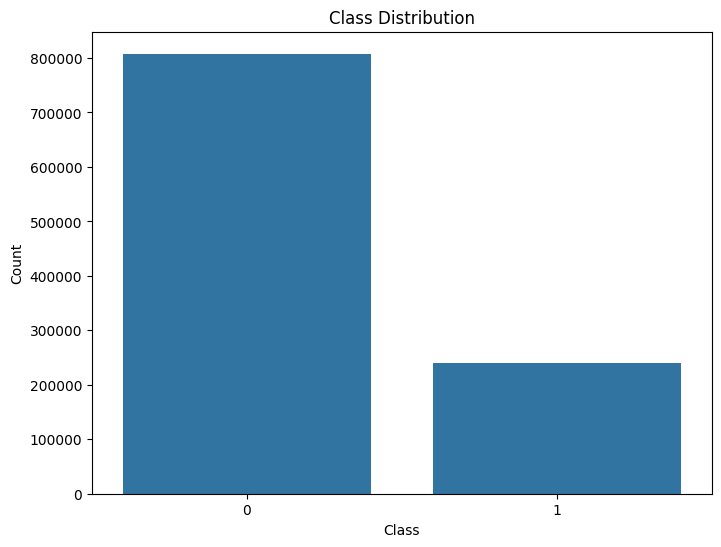

In [80]:
# Class distribution
class_counts = df['Target'].value_counts()
print("Class Distribution:")
print(class_counts)

# Percentage distribution
class_percent = df['Target'].value_counts(normalize=True) * 100
print("\nClass Distribution (Percentage):")
print(class_percent)

# Visualizing class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [81]:
df.dtypes

,0
pH,float64
Iron,float64
Nitrate,float64
Chloride,float64
Lead,float64
Zinc,float64
Color,object
Turbidity,float64
Fluoride,float64
Copper,float64


In [82]:
def reduce_memory_usage(df):
    """
    This function optimizes the memory usage of a DataFrame by reducing the precision of numeric columns.
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print(f"Memory usage before optimization: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != object:  # Only for numeric columns
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                else:
                    df[col] = df[col].astype(np.int64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2  # Convert to KB
    print(f"Memory usage after optimization: {end_mem:.2f} MB")
    print(f"Reduction of {100 * (start_mem - end_mem) / start_mem:.1f}%")
    return df

# Apply the function to your DataFrame
df = reduce_memory_usage(df)


Memory usage before optimization: 192.00 MB
Memory usage after optimization: 71.00 MB
Reduction of 63.0%


In [83]:
df.dtypes

,0
pH,float16
Iron,float16
Nitrate,float16
Chloride,float16
Lead,float16
Zinc,float16
Color,object
Turbidity,float16
Fluoride,float16
Copper,float16


In [84]:
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
pH                        20231
Iron                       6991
Nitrate                   18695
Chloride                  30834
Lead                       4684
Zinc                      27675
Color                       981
Turbidity                  8694
Fluoride                  33218
Copper                    34882
Odor                      31332
Sulfate                   34525
Conductivity              28803
Chlorine                  10162
Manganese                 19339
Total Dissolved Solids      298
Source                    15535
Water Temperature         29688
Air Temperature            5303
Month                     16921
Day                       17549
Time of Day               20361
Target                        0
dtype: int64


In [85]:
# Drop rows with any null values
df = df.dropna()

# Display the updated DataFrame
print(f"Rows remaining after dropping null values: {len(df)}")
df.head()

Rows remaining after dropping null values: 701056


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
1,6.917969,0.000081,3.734375,227.00,0.0,1.245117,Faint Yellow,0.019012,0.623047,0.437744,...,3.292969,7.748604e-07,284.7500,Lake,15.351562,71.250000,November,26.0,16.0,0
2,5.445312,0.020111,3.816406,231.00,0.0,0.528320,Light Yellow,0.320068,0.423340,0.431641,...,3.560547,7.006836e-02,570.0000,River,11.640625,44.906250,January,31.0,8.0,0
4,8.093750,0.002167,9.929688,186.50,0.0,3.806641,Light Yellow,0.004868,0.222900,0.616699,...,3.177734,3.295898e-03,168.1250,Spring,15.250000,69.312500,June,29.0,7.0,0
7,7.257812,0.000000,9.257812,182.25,0.0,0.416504,Colorless,0.047791,1.016602,0.298096,...,2.324219,0.000000e+00,214.5000,River,15.890625,61.125000,April,11.0,4.0,0
9,7.101562,0.003019,3.621094,157.00,0.0,0.112976,Colorless,0.050598,0.842285,0.391602,...,2.285156,8.940697e-07,113.9375,River,11.898438,14.007812,April,7.0,12.0,0


In [86]:
le_source = LabelEncoder()
le_color = LabelEncoder()

df['Source'] = le_source.fit_transform(df['Source'])
df['Color'] = le_color.fit_transform(df['Color'])
month_mapping = {
            'January': 1, 'February': 2, 'March': 3, 'April': 4,
            'May': 5, 'June': 6, 'July': 7, 'August': 8,
            'September': 9, 'October': 10, 'November': 11, 'December': 12
              }
df['Month'] = df['Month'].map(month_mapping)


<ipython-input-86-9ecd2002eb09>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Source'] = le_source.fit_transform(df['Source'])
<ipython-input-86-9ecd2002eb09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color'] = le_color.fit_transform(df['Color'])
<ipython-input-86-9ecd2002eb09>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [87]:
# Separate features and target
X = df.drop("Target", axis=1)
y = df["Target"]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Number of components selected
n_components = pca.n_components_
print(f"Number of components selected to retain 95% variance: {n_components}")

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of Selected Components:", explained_variance)
print("Cumulative Explained Variance:", np.cumsum(explained_variance))


Number of components selected to retain 95% variance: 21
Explained Variance Ratio of Selected Components: [0.0740009  0.04604972 0.0456425  0.04557494 0.04552662 0.04548015
 0.0453851  0.04530226 0.04523884 0.04487359 0.04481133 0.04469189
 0.04395828 0.04390777 0.04348193 0.04319953 0.04313592 0.04288237
 0.04235947 0.0420469  0.04137748]
Cumulative Explained Variance: [0.0740009  0.12005062 0.16569312 0.21126805 0.25679467 0.30227482
 0.34765992 0.39296217 0.43820101 0.4830746  0.52788594 0.57257783
 0.61653611 0.66044388 0.70392581 0.74712534 0.79026126 0.83314363
 0.87550311 0.91755    0.95892748]


In [88]:
X = df.drop('Target', axis=1)
y = df['Target']
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [90]:
# Initialize CodeCarbon tracker for the train
trackerNaiveBayesTrain = EmissionsTracker(project_name="Naive Bayes")
trackerNaiveBayesTrain.start()

# Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Stop CodeCarbon tracker for the train
emissionsNaiveBayesTrain = trackerNaiveBayesTrain.stop()

# Initialize CodeCarbon tracker for the test
trackerNaiveBayesTest = EmissionsTracker(project_name="Naive Bayes")
trackerNaiveBayesTest.start()

# Predictions
y_pred = model.predict(X_test)

# Stop CodeCarbon tracker for the test
emissionsNaiveBayesTest = trackerNaiveBayesTest.stop()

# Classification report
report = classification_report(y_test, y_pred, output_dict=False)
print("Naive Bayes Classification Report:")
print(report)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
# Handle NoneType emissions
if emissionsNaiveBayesTrain is not None:
    print(f"CO2 Emissions Train (g): {emissionsNaiveBayesTrain*1000:.4f}")
else:
    print("CO2 Emissions data could not be calculated.")

if emissionsNaiveBayesTest is not None:
    print(f"CO2 Emissions Test (g): {emissionsNaiveBayesTest*1000:.4f}")
else:
    print("CO2 Emissions data could not be calculated.")

[codecarbon INFO @ 17:05:25] [setup] RAM Tracking...
[codecarbon INFO @ 17:05:25] [setup] GPU Tracking...
[codecarbon INFO @ 17:05:25] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:05:25] [setup] CPU Tracking...
[codecarbon WARNING @ 17:05:25] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 17:05:26] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:05:26] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 17:05:26] >>> Tracker's metadata:
[codecarbon INFO @ 17:05:26]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:05:26]   Python version: 3.10.12
[codecarbon INFO @ 17:05:26]   CodeCarbon version: 2.8.1
[codecarbon INFO @ 17:05:26]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:05:26]   CPU count: 2
[codeca

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89    107727
           1       0.65      0.48      0.55     32485

    accuracy                           0.82    140212
   macro avg       0.75      0.70      0.72    140212
weighted avg       0.81      0.82      0.81    140212

Accuracy: 0.82
CO2 Emissions Train (g): 0.0037
CO2 Emissions Test (g): 0.0024


In [91]:
# Initialize CodeCarbon tracker for the train
trackerDecisionTreeTrain = EmissionsTracker(project_name="Decision tree")
trackerDecisionTreeTrain.start()

# Create and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42, max_depth=3)
model.fit(X_train, y_train)

# Stop CodeCarbon tracker for the train
emissionsDecisionTreeTrain = trackerDecisionTreeTrain.stop()

# Initialize CodeCarbon tracker for the test
trackerDecisionTreeTest = EmissionsTracker(project_name="Decision tree")
trackerDecisionTreeTest.start()

# Make predictions
y_pred = model.predict(X_test)

# Stop CodeCarbon tracker for the test
emissionsDecisionTreeTest = trackerDecisionTreeTest.stop()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:")
print(report)
print(f"Accuracy: {accuracy:.2f}")
# Handle NoneType emissions
if emissionsDecisionTreeTrain is not None:
    print(f"CO2 Emissions Train(g): {emissionsDecisionTreeTrain*1000:.4f}")
else:
    print("CO2 Emissions data could not be calculated.")

if emissionsDecisionTreeTest is not None:
    print(f"CO2 Emissions Test(g): {emissionsDecisionTreeTest*1000:.4f}")
else:
    print("CO2 Emissions data could not be calculated.")

[codecarbon INFO @ 17:05:35] [setup] RAM Tracking...
[codecarbon INFO @ 17:05:35] [setup] GPU Tracking...
[codecarbon INFO @ 17:05:35] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:05:35] [setup] CPU Tracking...
[codecarbon WARNING @ 17:05:35] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 17:05:36] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:05:36] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 17:05:36] >>> Tracker's metadata:
[codecarbon INFO @ 17:05:36]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:05:36]   Python version: 3.10.12
[codecarbon INFO @ 17:05:36]   CodeCarbon version: 2.8.1
[codecarbon INFO @ 17:05:36]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:05:36]   CPU count: 2
[codeca

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88    107727
           1       0.62      0.59      0.61     32485

    accuracy                           0.82    140212
   macro avg       0.75      0.74      0.75    140212
weighted avg       0.82      0.82      0.82    140212

Accuracy: 0.82
CO2 Emissions Train(g): 0.0799
CO2 Emissions Test(g): 0.0002


In [92]:
# Initialize CodeCarbon tracker for the train
trackerMLPClassifierTrain = EmissionsTracker(project_name="MLPClassifier")
trackerMLPClassifierTrain.start()

# Build and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(50, 5), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Stop CodeCarbon tracker for the train
emissionsMLPClassifierTrain = trackerMLPClassifierTrain.stop()

# Initialize CodeCarbon tracker for the test
trackerMLPClassifierTest = EmissionsTracker(project_name="MLPClassifier")
trackerMLPClassifierTest.start()

# Make predictions
y_pred = mlp.predict(X_test)

# Stop CodeCarbon tracker for the test
emissionsMLPClassifierTest = trackerMLPClassifierTest.stop()

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("MLP Classification Report:")
print(report)
print(f"Accuracy: {accuracy:.2f}")
# Handle NoneType emissions
if emissionsMLPClassifierTrain is not None:
    print(f"CO2 Emissions Train(g): {emissionsMLPClassifierTrain*1000:.4f}")
else:
    print("CO2 Emissions data could not be calculated.")

if emissionsMLPClassifierTest is not None:
    print(f"CO2 Emissions Test(g): {emissionsMLPClassifierTest*1000:.4f}")
else:
    print("CO2 Emissions data could not be calculated.")

[codecarbon INFO @ 17:06:44] [setup] RAM Tracking...
[codecarbon INFO @ 17:06:44] [setup] GPU Tracking...
[codecarbon INFO @ 17:06:44] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 17:06:44] [setup] CPU Tracking...
[codecarbon WARNING @ 17:06:44] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 17:06:45] We saw that you have a Intel(R) Xeon(R) CPU @ 2.00GHz but we don't know it. Please contact us.
[codecarbon INFO @ 17:06:45] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.00GHz
[codecarbon INFO @ 17:06:45] >>> Tracker's metadata:
[codecarbon INFO @ 17:06:45]   Platform system: Linux-6.1.85+-x86_64-with-glibc2.35
[codecarbon INFO @ 17:06:45]   Python version: 3.10.12
[codecarbon INFO @ 17:06:45]   CodeCarbon version: 2.8.1
[codecarbon INFO @ 17:06:45]   Available RAM : 12.675 GB
[codecarbon INFO @ 17:06:45]   CPU count: 2
[codeca

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    107727
           1       0.65      0.94      0.77     32485

    accuracy                           0.87    140212
   macro avg       0.81      0.89      0.84    140212
weighted avg       0.90      0.87      0.87    140212

Accuracy: 0.87
CO2 Emissions Train(g): 1.5981
CO2 Emissions Test(g): 0.0011
